# **Hands-on Activity 6.1 | Introduction to Data Analysis and Tools**
Name: Delloson, Angelo Dan Renz G.

Section: CPE22S2

Performed on: 06/20/2024

Submitted on: MM/DD/YYYY

Submitted to: Engr. Roman M. Richard

6.1 Intended Learning Outcome

1. Use pandas and numpy data analysis tools.

2. Demonstrate how to analyze data using numpy and pandas

# 6.2 Resources:

Personal Computer

Jupyter Notebook

Internet Connection

# 6.3 Supplementary Activities:

# **Exercise 1**

Run the given code below for exercises 1 and 2, perform the given tasks without using any Python module

In [3]:
import random
random.seed(0)
salaries = [round(random.random()*1000000, -3) for _ in range(100)]

Using the data generated above, calculate the following statistics without importing anything from the statistics module in the
standard library (https://docs.python.org/3/library/statistics.html) and then confirm your results match up to those that are
obtained when using the statistics module (where possible):

Mean

Median

Mode (hint: check out the Counter in the collections module of the standard library at
https://docs.python.org/3/library/collections.html#collections.Counter)

Sample variance

Sample standard deviation


In [4]:
# Write a comment per statistical function
from statistics import median
from math import isnan
from itertools import filterfalse

def cal_mean(data):
    return sum(data) / len(data)
mean = cal_mean(salaries)

def cal_median(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    midpoint = n // 2

    if n% 2 == 1:
        return sorted_data[midpoint]
    else:
        return (sorted_data[midpoint - 1] + sorted_data[midpoint]) / 2
median = cal_median

In [5]:
from collections import Counter

def cal_mode(data):
    frequency = Counter(data)
    mode_data = frequency.most_common(1)
    return mode_data [0][0] if mode_data else None

mode = cal_mode(salaries)

In [6]:
def cal_sampVar(data):
    mean = cal_mean(data)
    squared_diff = [(x - mean) ** 2 for x in data]
    return sum(squared_diff) / (len(data) -1)

sampleVariance = cal_sampVar(salaries)


In [7]:
def cal_stdDev(data):
    variance = cal_sampVar(data)
    return variance ** 0.5

sample_stdDev = cal_stdDev(salaries)

In [8]:
print("Median: ", mean)
print("Mean: ", median)
print("Mode: ", mode)
print("Sample Varieance: ", sampleVariance)
print("Sample Standard Deviation: ", sample_stdDev)

Median:  585690.0
Mean:  <function cal_median at 0x7808c4202e60>
Mode:  477000.0
Sample Varieance:  70664054444.44444
Sample Standard Deviation:  265827.11382484


In [9]:
import pandas as pd

data = pd.DataFrame(salaries)
data.describe()

,0
count,100.000000
mean,585690.000000
std,265827.113825
min,1000.000000
25%,403500.000000
50%,589000.000000
75%,816750.000000
max,996000.000000


# Exercise 2

Using the same data, calculate the following statistics using the functions in the statistics module where appropriate:

Range

Coefficient of variation Interquartile range

Quartile coefficient of dispersion

In [10]:
# Write a comment per statistical function
range = max(salaries) - min(salaries) # range function

mean = cal_mean(salaries) # COV function
standardDev = cal_stdDev(salaries)
COV = (standardDev / mean) * 100

def cal_iqr(data): # interquartile range function
    sorted_data = sorted(data)
    q1 = cal_median(sorted_data[:len(sorted_data) // 2])
    q3 = cal_median(sorted_data[(len(sorted_data) + 1) // 2:])
    return q3 - q1

iqr = cal_iqr(salaries)

def cal_qd(data): # quartile dispersion function
    sorted_data = sorted(data)
    q1 = cal_median(sorted_data[:len(sorted_data) // 2])
    q3 = cal_median(sorted_data[(len(sorted_data) + 1) // 2:])
    return (q3 - q1) / (q3 + q1)

qd = cal_qd(salaries)

# output
print(f"Range:", range)
print(f"Coefficient of Variation:%", COV)
print(f"Interquartile Range:", iqr)
print(f"Quartile Coefficient of Dispersion:", qd)

Range: 995000.0
Coefficient of Variation:% 45.38699889443903
Interquartile Range: 417500.0
Quartile Coefficient of Dispersion: 0.3417928776094965


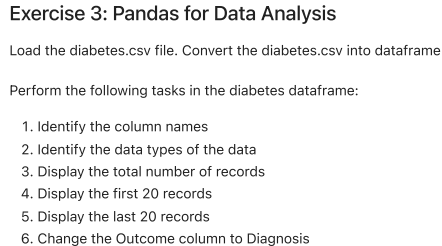
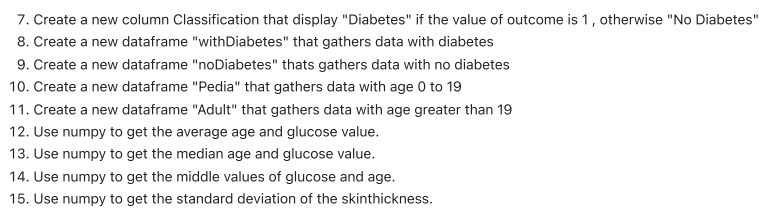

In [16]:
 #Indicate which item you're answering with a comment

filepath = '/content/diabetes.csv'
data = pd.read_csv(filepath)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
# Identify the column names
column_names = list(data.columns)

print(column_names)


['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [18]:
#Identify the data types of the data
dataTypes = data.dtypes

print(dataTypes)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [19]:
# Display the total number of records
noRecords = len(data)

print(noRecords)

768


In [20]:
# Display the first 20 records
first20Records = data.head(20)

print(first20Records)

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

In [21]:
# Display the last 20 records
last20Records = data.tail(20)

print(last20Records)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
748            3      187             70             22      200  36.4   
749            6      162             62              0        0  24.3   
750            4      136             70              0        0  31.2   
751            1      121             78             39       74  39.0   
752            3      108             62             24        0  26.0   
753            0      181             88             44      510  43.3   
754            8      154             78             32        0  32.4   
755            1      128             88             39      110  36.5   
756            7      137             90             41        0  32.0   
757            0      123             72              0        0  36.3   
758            1      106             76              0        0  37.5   
759            6      190             92              0        0  35.5   
760            2       88             

In [22]:
# Change the Outcome column to Diagnosis
data.rename(columns={'Outcome': 'Diagnosis'}, inplace=True)

print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Diagnosis  
0                       0.627   50          1  
1              

In [23]:
# Create a new column Classification that display "Diabetes" if the value of outcome is 1 , otherwise "No Diabetes"
data['Classification'] = data['Diagnosis'].apply(lambda x: 'Diabetes' if x == 1 else 'No Diabetes')

print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Diagnosis Classification  
0                       0.627   50          1   

In [24]:
# Create a new dataframe "withDiabetes" that gathers data with diabetes
withDiabetes = data[data['Diagnosis'] == 1]

print(withDiabetes)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
2              8      183             64              0        0  23.3   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
..           ...      ...            ...            ...      ...   ...   
755            1      128             88             39      110  36.5   
757            0      123             72              0        0  36.3   
759            6      190             92              0        0  35.5   
761            9      170             74             31        0  44.0   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  Diagnosis Classification  
0                       0.627   50          1   

In [25]:
# Create a new dataframe "noDiabetes" thats gathers data with no diabetes
noDiabetes = data[data['Diagnosis'] == 0]

print(noDiabetes)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1              1       85             66             29        0  26.6   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
7             10      115              0              0        0  35.3   
10             4      110             92              0        0  37.6   
..           ...      ...            ...            ...      ...   ...   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Diagnosis Classification  
1                       0.351   31          0   

In [26]:
# Create a new dataframe "Pedia" that gathers data with age 0 to 19
Pedia = data[(data['Age'] >= 0) & (data['Age'] <= 19)]

print(Pedia)

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Diagnosis, Classification]
Index: []


In [27]:
# Create a new dataframe "Adult" that gathers data with age greater than 19
Adult = data[data['Age'] > 19]

print(Adult)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Diagnosis Classification  
0                       0.627   50          1   

In [28]:
# Use numpy to get the average age and glucose value.
import numpy as np

aveAge = np.mean(data['Age'])
aveGlucose = np.mean(data['Glucose'])

print("Average Age:", aveAge)
print("Average Glucose:", aveGlucose)

Average Age: 33.240885416666664
Average Glucose: 120.89453125


In [32]:
# Use numpy to get the median age and glucose value.
medAge = np.median(data['Age'])
medGlucose = np.median(data['Glucose'])

print("Median Age:", medAge)
print("Median Glucose:", medGlucose)

Median Age: 29.0
Median Glucose: 117.0


In [33]:
# Use numpy to get the middle values of glucose and age.
midGlucose = np.median(data['Glucose'])
midAge = np.median(data['Age'])

print("Middle Glucose:", midGlucose)
print("Middle Age:", midAge)

Middle Glucose: 117.0
Middle Age: 29.0


In [34]:
# Use numpy to get the standard deviation of the skinthickness
stdSkinThickness = np.std(data['SkinThickness'])

print("Standard Deviation of Skin Thickness:", stdSkinThickness)


Standard Deviation of Skin Thickness: 15.941828626496939


# **Conclusion**
*This lesson shows us how to use data analysis tools like Pandas and Numpy. It helps us do the job. We learn to handle large sets of data easily with these tools. This makes analyzing and understanding data much simpler.*